<a href="https://colab.research.google.com/github/kevinluyo42/UTEC_DS-IA/blob/main/1_hill_climbing_n_queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hill climbing search

![](https://drive.google.com/uc?export=view&id=1IlgFVvt98JrqeC7A1eracheX7oUHBx0E)

In [1]:
print("prueba")

prueba


In [ ]:
import numpy as np

TSP = [
    [0,   200,  600,  100],
    [200,   0,  300,  100],
    [600, 300,  0,    400],
    [100, 100,  400,  0],
]

# Step 1
current_solution = np.array([0,1,2,3])
np.random.shuffle( current_solution )

print(current_solution)

[3 2 0 1]


In [ ]:
def fitness(sol):
  distance = 0
  for i in range(  len(sol) - 1  ):
    distance = distance + TSP[ sol[i] ][ sol[i+1] ]

  return distance

print( fitness(current_solution) )

1200


In [ ]:
def get_neighbors(sol):
  neighbors = []

  for i in range( len(sol) - 1 ):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j]  = new_sol[j] , new_sol[i] # swap
      neighbors.append(new_sol)

  return neighbors

print( current_solution )
print( get_neighbors(current_solution) )

[2 1 0 3]
[array([1, 2, 0, 3]), array([0, 1, 2, 3]), array([3, 1, 0, 2]), array([2, 0, 1, 3]), array([2, 3, 0, 1]), array([2, 1, 3, 0])]


In [ ]:
def hill_climbing():
  # step 1:
  current_solution = np.array([0,1,2,3])
  np.random.shuffle( current_solution )

  while True:
    print("Iteration...")
    neighbors = get_neighbors(current_solution)
    best_neighbor = min( neighbors, key = fitness )

    print("current_solution", current_solution, " fitness:", fitness( current_solution ) )
    print("neighbors", neighbors)
    print("best_neighbor", best_neighbor, " fitness:", fitness( best_neighbor ) )
    print()

    if fitness(best_neighbor) < fitness( current_solution ):
      current_solution = best_neighbor
    else:
      return current_solution

hill_climbing()





Iteration...
current_solution [2 3 0 1]  fitness: 700
neighbors [array([3, 2, 0, 1]), array([0, 3, 2, 1]), array([1, 3, 0, 2]), array([2, 0, 3, 1]), array([2, 1, 0, 3]), array([2, 3, 1, 0])]
best_neighbor [2 1 0 3]  fitness: 600

Iteration...
current_solution [2 1 0 3]  fitness: 600
neighbors [array([1, 2, 0, 3]), array([0, 1, 2, 3]), array([3, 1, 0, 2]), array([2, 0, 1, 3]), array([2, 3, 0, 1]), array([2, 1, 3, 0])]
best_neighbor [2 1 3 0]  fitness: 500

Iteration...
current_solution [2 1 3 0]  fitness: 500
neighbors [array([1, 2, 3, 0]), array([3, 1, 2, 0]), array([0, 1, 3, 2]), array([2, 3, 1, 0]), array([2, 0, 3, 1]), array([2, 1, 0, 3])]
best_neighbor [2 1 0 3]  fitness: 600



array([2, 1, 3, 0])

# HC con plot

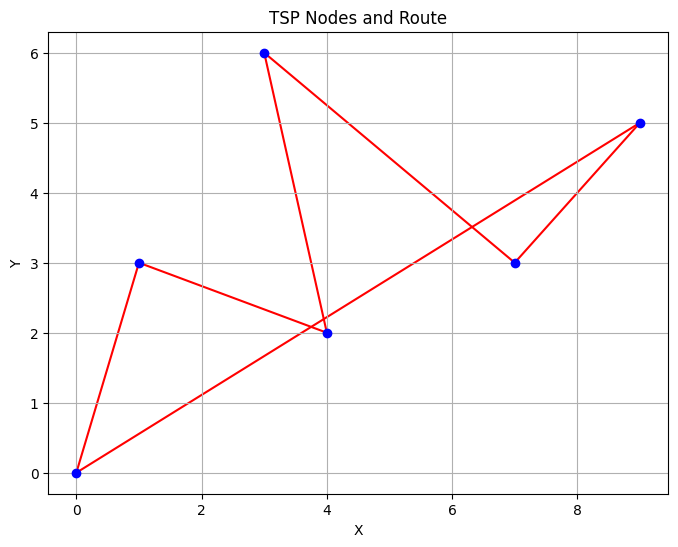

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

In [ ]:
print(distances)

[[0.         0.63199944 0.48639207 ... 0.34706188 0.1623251  0.4672373 ]
 [0.63199944 0.         0.28533534 ... 0.39017661 0.65951979 1.04045429]
 [0.48639207 0.28533534 0.         ... 0.42580449 0.58085792 0.94794468]
 ...
 [0.34706188 0.39017661 0.42580449 ... 0.         0.29936405 0.66596578]
 [0.1623251  0.65951979 0.58085792 ... 0.29936405 0.         0.38187193]
 [0.4672373  1.04045429 0.94794468 ... 0.66596578 0.38187193 0.        ]]


In [ ]:
N = 100 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
print(pdist(positions, 'euclidean'))
print(squareform(pdist(positions, 'euclidean')))

[0.50933215 0.26772624 0.31869476 ... 0.47164252 0.42216313 0.5839857 ]
[[0.         0.50933215 0.26772624 ... 0.23791101 0.33889345 0.59008483]
 [0.50933215 0.         0.50033181 ... 0.71203971 0.29429981 0.87824917]
 [0.26772624 0.50033181 0.         ... 0.48261392 0.48741736 0.85775431]
 ...
 [0.23791101 0.71203971 0.48261392 ... 0.         0.47164252 0.42216313]
 [0.33889345 0.29429981 0.48741736 ... 0.47164252 0.         0.5839857 ]
 [0.59008483 0.87824917 0.85775431 ... 0.42216313 0.5839857  0.        ]]


In [ ]:
N = 100 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
distances = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades


In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + distances[ sol[i]  ][ sol[i+1]  ]

  return distance

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

2.231245821491728


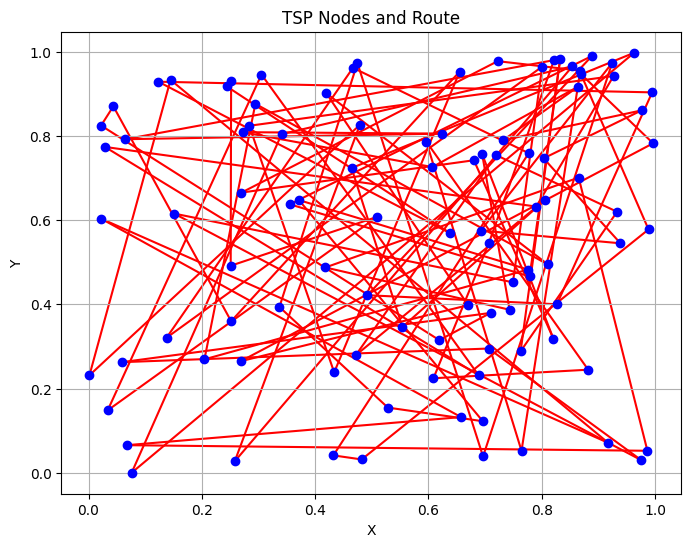

Iteration...
fitness current_solution 56.21791091623744
fitness best_neighbor 53.32355304914201

Iteration...
fitness current_solution 53.32355304914201
fitness best_neighbor 50.63387735048478

Iteration...
fitness current_solution 50.63387735048478
fitness best_neighbor 48.28809524626555

Iteration...
fitness current_solution 48.28809524626555
fitness best_neighbor 45.948721950431434

Iteration...
fitness current_solution 45.948721950431434
fitness best_neighbor 44.05602761988318

Iteration...
fitness current_solution 44.05602761988318
fitness best_neighbor 42.32413972797245

Iteration...
fitness current_solution 42.32413972797245
fitness best_neighbor 40.718122008438954

Iteration...
fitness current_solution 40.718122008438954
fitness best_neighbor 39.12529835260989

Iteration...
fitness current_solution 39.12529835260989
fitness best_neighbor 37.67606327724174

Iteration...
fitness current_solution 37.67606327724174
fitness best_neighbor 36.28734304398937

Iteration...
fitness curre

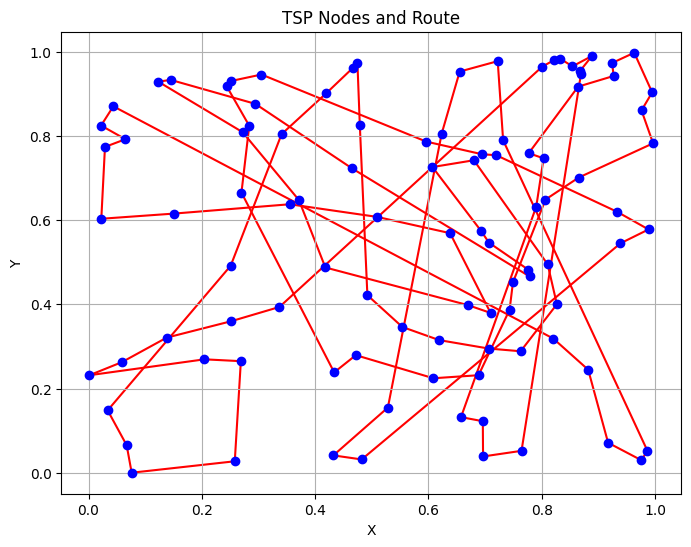


 'good' solution: [12 13 32 63 73 67  9 82 87 20 27 99 48 31 40 41 57 38  4 35 64 72 61 16
 37 98 10  3  5 14 81 97 95 86 91 18 74 53 51 75 33  7 11 21 25 55  0 28
 15 83 90 43 39 24 77 88 80 76 62 22 85 23 30 84 44 93 78 50  1 52 19 42
 26 92 34 68 29 60 66 54 79 56 49  2 71 89 47 17 36 59 70 45 65 96 69  6
 58  8 46 94]


In [ ]:
def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array(range(N))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    #print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    #print("neighbors", neighbors)
    #print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()
plot_tsp(positions, solution)

print("\n 'good' solution:", solution)


